## Contents

* [Company Overview](#CompanyOverview)
    * [D&I Index Ranking](#D&IIndexRanking)

Throughout this article, we will use Python version 3.7.7:

In [1]:
# The ' from ... import ' structure here allows us to only import the module ' python_version ' from the library ' platform ':
from platform import python_version
print("This code runs on Python version " + python_version())

This code runs on Python version 3.7.7


## COMPANY OVERVIEW <a class="anchor" id="CompanyOverview"></a>

In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
import eikon as ek

# The key is placed in a text file so that it may be used in this code without showing it itself:
eikon_key = open("eikon.txt","r")
ek.set_app_key(str(eikon_key.read()))
# It is best to close the files we opened in order to make sure that we don't stop any other services/programs from accessing them if they need to:
eikon_key.close()

In [4]:
instrument_list = ["VOD.L", "IBM"]

In [5]:
def function(instruments = instrument_list,
             overshadowed_currency = None,
             market_cap_currency = None,
             revenue_currency = None,
             currency_of_precedence = None):
    
    
    ## Currency Preperation:
    
    # ' overshadowed_currency ' takes last priority over all other (more granular) currency specifications in our function's arguments.
    if overshadowed_currency == None:
        cur = "Native"
    else:
        cur = str(overshadowed_currency)
        market_cap_cur = str(overshadowed_currency)
        revenue_cur = str()
    
    # If the function's user wants market capitalisation at a specific currency, let it be:
    if market_cap_currency == None:
        market_cap_cur = "Native"
    else:
        market_cap_cur = str(market_cap_currency)
    
    # If the function's user wants revenues at a specific currency, let it be:
    if market_cap_currency == None:
        revenue_cur = "Native"
    else:
        revenue_cur = str(revenue_currency)
    
    # ' currency_of_precedence ' takes presidence over all other (more granular) currency specifications in our function's arguments.
    if currency_of_precedence == None:
        cur = "Native"
    else:
        cur = str(currency_of_precedence)
        market_cap_cur = str(currency_of_precedence)
    
    
    ## Data Collection:
    
    df = ek.get_data(
        instruments = instruments,
        fields = [
            'TR.CommonName',
            f'TR.CompanyMarketCap(Curn={market_cap_cur})',
            'TR.TRBCIndustry',
            'TR.TRBCIndustryGroup',
            f'TR.InvtrRevenue(Curn={revenue_cur})',
            'TR.CompanyNumEmploy',
            'TR.TRDIRScore',
            'TR.ExchangeCountry',
            'TR.CompanyFYearEnd',
            'TR.CSRReportingScope',
            'TR.TRESGScore',
            'TR.TRESGScoreGrade',
            'TR.TRESGCControversiesScore',
            'TR.TRESGCControversiesScoreGrade',
            'TR.TRESGCScore',
            'TR.TRESGCScoreGrade',
            'TR.EnvironmentPillarScore',
            'TR.EnvironmentPillarScoreGrade',
            'TR.SocialPillarScore',
            'TR.SocialPillarScoreGrade',
            'TR.GovernancePillarScore',
            'TR.GovernancePillarScoreGrade'
        ]
    )[0] # ' ek.get_data ' returns two objects, (i) the pandas data-frame with the data we're after, and (ii) any error messages that come with it if any do; thus the ' [0] '.
    
    return df

In [6]:
df = function()

C:\ProgramData\Anaconda3\envs\r-tutorial\lib\site-packages\eikon\data_grid.py:247: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  data = pd.np.array([[get_data_value(value) for value in row] for row in data_dict['data']])


In [7]:
df.T

,0,1
Instrument,VOD.L,IBM
Company Common Name,Vodafone Group PLC,International Business Machines Corp
Company Market Cap,3.58183e+10,1.14032e+11
TRBC Industry Name,Wireless Telecommunications Services,IT Services & Consulting
TRBC Industry Group Name,Telecommunications Services,Software & IT Services
Revenue,2.6116e+09,NaN
Number of Employees,95219,375300
DIR Score,68.25,67.25
Country of Exchange,United Kingdom,United States of America
Fiscal Year End Date,2021-03-31,2021-12-31


#### D&I Index Ranking <a class="anchor" id="D&IIndexRanking"></a>

### Heatmap

In [8]:
import seaborn as sb

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

We're going to look at data in our  ```df``` spcifically for a set of data points, let's store them in a list ```heatmap_headers``` for ease:

In [10]:
heatmap_headers = ["ESG Score",
                   "ESG Controversies Score",
                   "ESG Combined Score",
                   "Environmental Pillar Score",
                   "Social Pillar Score",
                   "Governance Pillar Score"]

[Now let's specify what will be written on top of our heatmap](https://likegeeks.com/seaborn-heatmap-tutorial/):

In [11]:
heatmap_data = np.array(
    [df[df["Instrument"] == "VOD.L"][
        heatmap_headers
    ].values.tolist()[0]]).reshape(2,3)

In [12]:
heatmap_data

array([[81.06499722,  5.35714286, 43.21107004],
       [71.02259429, 80.29240792, 90.31364356]])

In [13]:
heatmap_text = np.array(
    [f"{i}\n{j}\n{k}" for i,j,k in zip(
        df[df["Instrument"] == "VOD.L"][
            [f"{p} Grade" for p in heatmap_headers]].values[0].tolist(),
        [f"{round(q, 2)}%" for q in heatmap_data.flatten().tolist()],
        [r.replace(" ", "\n") for r in heatmap_headers])]).reshape(2,3)

In [14]:
heatmap_text

array([['A-\n81.06%\nESG\nScore', 'D-\n5.36%\nESG\nControversies\nScore',
        'C+\n43.21%\nESG\nCombined\nScore'],
       ['B+\n71.02%\nEnvironmental\nPillar\nScore',
        'A-\n80.29%\nSocial\nPillar\nScore',
        'A\n90.31%\nGovernance\nPillar\nScore']], dtype='<U36')

[Define the color scheme of our heatmap](https://stackoverflow.com/questions/38246559/how-to-create-a-heat-map-in-python-that-ranges-from-green-to-red) using [matplotlib.colors.LinearSegmentedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html#matplotlib.colors.LinearSegmentedColormap):

In [15]:
# This dictionary defines the colormap
cdict = {'green':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'red': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

# Create the colormap using the dictionary
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)

Finally, let's plot our heatmap:

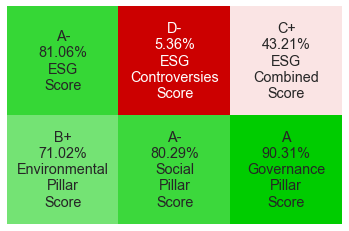

In [16]:
sb.set(font_scale = 1.2)
heat_map = sb.heatmap(heatmap_data,
                      fmt = '', # this is to stop the ' Unknown format code 'g' for object of type 'numpy.str_' ' error.
                      annot = heatmap_text,
                      cbar = False,
                      cmap = GnRd, # can also use format such as ' sb.diverging_palette(250, 30, l=65, center="dark", as_cmap=True) '.
                      xticklabels = False,
                      yticklabels = False)

## ESG SUMMARY

In [17]:
def Dat(instrument, field):
    """We are going to request for data from the Pandas data-frame ' df ' a lot.
    I thus thought is more concise to create this function.
    The name ' Dat ' simply refers to Data, as in the data requested from df."""
    
    return df[df["Instrument"] == instrument][field][0]

In [18]:
esg_score_timeseries = ek.get_data(
    instruments = ["VOD.L"],
    fields = ["TR.TRESGScore(SDate=0,EDate=-4,Period=FY0,Frq=FY)"])[0]["ESG Score"]

C:\ProgramData\Anaconda3\envs\r-tutorial\lib\site-packages\eikon\data_grid.py:247: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  data = pd.np.array([[get_data_value(value) for value in row] for row in data_dict['data']])


In [19]:
esg_summary = (
    Dat("VOD.L", "Company Common Name") +
    " is a(n) " + Dat("VOD.L", "TRBC Industry Group Name") +
    " headquartered in (the) " + Dat("VOD.L", "Country of Exchange") +
    ". For the fiscal year ended in " +
    datetime.datetime.strptime(Dat("VOD.L", "Fiscal Year End Date"), "%Y-%m-%d").strftime("%B %Y") +
    ", " + "VOD.L" +
    " received an ESG score of " + str(round(Dat("VOD.L", "ESG Score"), 2)) + 
    " which is equivalent to Grade '" + Dat("VOD.L", "ESG Score Grade") + "'.\n" +
    "Over the last 5 years, the company has an average ESG score of " +
    str(round(esg_score_timeseries.mean(), ndigits = 2)) + 
    ", and a median ESG score of " + str(round(esg_score_timeseries.median(), ndigits = 2)) +
    ". Refinitiv's ESG score is calculated as a sum of weighted individual pillar scores.\n" +
    "VOD.L" + "'s controversy score of " +
    str(round(Dat("VOD.L", "ESG Controversies Score"), 2)) +
    " (Grade: '" + Dat("VOD.L", "ESG Controversies Score Grade") +
    "') is calculated based on total count of controversies related to the company, " +
    "as collected by Refinitiv ESG team and normalized based on company’s market capitalization." +
    " Discounted by its controversies, " + "VOD.L" + " received an ESG Combined score of " +
    str(round(Dat("VOD.L", "ESG Combined Score"), 2)) +
    " (Grade: '" + Dat("VOD.L", "ESG Combined Score Grade") + "') for the year.")

In [20]:
print(esg_summary)

Vodafone Group PLC is a(n) Telecommunications Services headquartered in (the) United Kingdom. For the fiscal year ended in March 2021, VOD.L received an ESG score of 81.06 which is equivalent to Grade 'A-'.
Over the last 5 years, the company has an average ESG score of 81.28, and a median ESG score of 81.01. Refinitiv's ESG score is calculated as a sum of weighted individual pillar scores.
VOD.L's controversy score of 5.36 (Grade: 'D-') is calculated based on total count of controversies related to the company, as collected by Refinitiv ESG team and normalized based on company’s market capitalization. Discounted by its controversies, VOD.L received an ESG Combined score of 43.21 (Grade: 'C+') for the year.


## COMPANY RELATIVE PERFORMANCE

In [21]:
peers,err = ek.get_data(['PEERS(VOD.L)','VOD.L'],['TR.CommonName','TR.CompanyMarketCap'])

In [22]:
peers

,Instrument,Company Common Name,Company Market Cap
0,BT.L,BT Group PLC,1.367792e+10
1,DTEGn.DE,Deutsche Telekom AG,7.849264e+10
2,TEF.MC,Telefonica SA,2.216480e+10
3,ORAN.PA,Orange SA,2.731177e+10
4,BOUY.PA,Bouygues SA,1.352637e+10
5,SCMN.S,Swisscom AG,2.497122e+10
6,O2Dn.DE,Telefonica Deutschland Holding AG,7.085390e+09
7,TLIT.MI,Telecom Italia SpA,9.902179e+09
8,UTDI.DE,United Internet AG,7.173840e+09
9,LBTYA.OQ,Liberty Global PLC,1.473490e+10


## References:

* [Sequential colormap](https://likegeeks.com/seaborn-heatmap-tutorial/)
* [Sequential “cubehelix” palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [seaborn.diverging_palette](https://seaborn.pydata.org/generated/seaborn.diverging_palette.html)
* [seaborn.set_color_codes](https://seaborn.pydata.org/generated/seaborn.set_color_codes.html#seaborn.set_color_codes)
* [seaborn.color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html)
* [seaborn.set_palette](https://seaborn.pydata.org/generated/seaborn.set_palette.html#seaborn.set_palette)
* [matplotlib.colors.Colormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.Colormap.html)
* [seaborn.choose_diverging_palette](https://seaborn.pydata.org/generated/seaborn.choose_diverging_palette.html#seaborn.choose_diverging_palette)
* [Sequential color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [Using circular color systems](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [Seaborn heatmap tutorial (Python Data Visualization): Add text over heatmap](https://likegeeks.com/seaborn-heatmap-tutorial/)
* [Graph point on straight line (number line) in Python](https://stackoverflow.com/questions/23186804/graph-point-on-straight-line-number-line-in-python)